 ## Exercise 2: Polynomial regression


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import utils
X = np.loadtxt('A2_datasets_2020/housing_price_index.csv', delimiter=',', usecols=0)
y = np.loadtxt('A2_datasets_2020/housing_price_index.csv', delimiter=',', usecols=1)

 Set varibles with old price for the house and the index of the year when the house was bought.<br>
 And creating matrices with values for polynomials with degree 1 to 4

In [8]:
old_price = 2_300_000
index_2015 = y[40]
X_degree_one = np.c_[np.ones((len(X), 1)), X]
X_degree_two = np.c_[np.ones((len(X), 1)), X, X**2]
X_degree_three = np.c_[np.ones((len(X), 1)), X, X**2, X**3]
X_degree_four = np.c_[np.ones((len(X), 1)), X, X**2, X**3, X**4]

 Calculating the betas for each degree using the normal equation and create a list of degree matrices
 and beta values

In [9]:
beta_one = utils.normal_equation(X_degree_one, y)
beta_two = utils.normal_equation(X_degree_two, y)
beta_three = utils.normal_equation(X_degree_three, y)
beta_four = utils.normal_equation(X_degree_four, y)

degrees = [X_degree_one, X_degree_two, X_degree_three, X_degree_four]
betas = [beta_one, beta_two, beta_three, beta_four]

 Original data plotted with the matrices from each degree

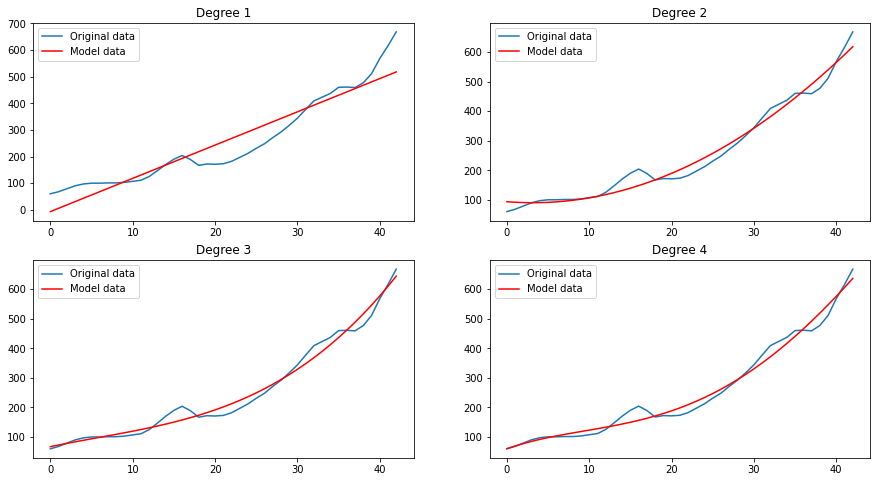

In [14]:
plt.figure(figsize=(15,8))
for i in range(len(betas)):
    degree = 'Degree ' + str(i + 1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X, y, label='Original data')
    plt.plot(X, degrees[i].dot(betas[i]), 'r-', label='Model data')
    plt.title(degree)
    plt.legend()
    
plt.show()

 Calculating the cost of each model and printing the result
 so that we can compare and find the one with lowest value

In [11]:
degree_num = 1
for degree, beta in zip(degrees, betas):
    cost = utils.cost_function(degree, y, beta)
    print('Degree', degree_num, 'cost:', round(cost, 3))
    degree_num = degree_num + 1

Degree 1 cost: 2896.094
Degree 2 cost: 585.068
Degree 3 cost: 454.543
Degree 4 cost: 443.76


 The model of degree four has the lowest cost value and is in this case the best model to use.<br>
 To predict the cost of a house in year 2022 the x value is 47 and the betas is in the
 beta_four vector

In [12]:
year = np.array([1, 47, 47**2, 47**3, 47**4])
predicted_index_2022 = round(year.dot(beta_four), 3)

 After prediction we get the index of year 2022 and can by that calculate the price and profit margin

In [13]:
print('Index in year 2022:', predicted_index_2022)
predicted_price_2022 = (old_price * predicted_index_2022) / index_2015
print('Price in year 2022:', int(round(predicted_price_2022)))
profit_margin = round((predicted_price_2022 - old_price) / predicted_price_2022, 3) * 100
print('Profit margin:', profit_margin, '%')

Index in year 2022: 799.336
Price in year 2022: 3236748
Profit margin: 28.9 %


 A profit margin of 28.9% is very realistic, this I base on the fact that the increase in value over five years (2013 -2018) on houses in
 Kronobergs län was 28% acording to Fastighetsbyrån (source: https://www.byggahus.se/ekonomi/sa-mycket-har-husen-okat-varde-fem)